# Classification using multiple algorithms
In this workbook, I have used the following classification algorithms to predict the passenger's survival of the Titanic
- <b>Logistic Regression </b>(tries to fit an S-curve into the data to separate into categories)
- <b>Linear Discriminant Analysis</b></b> (projects original data into linear axis to separate into categories)
- <b>Quadratic Discriminant Analysis</b>(projects original data into non linear axis to separate into categories)
- <b>Stochastic Gradient Descent</b>(uses gradient descent to find the lowest value of cross entropy during the training process of the model)
- <b>Linear Support Vector Machines </b>(tries to fit a hyper plane to separate the data)
- <b>Radius Nearest neighbors </b>(uses the labels associated with nearest neighbors to classify the data)
- <b>Naive Bayes</b>(uses bayes theory to classify the model)
- <b>Decision Trees </b>( builds a tree structures based on decision threshold and classification is performed by following the test sample down to the root node)
The dataset used is the Titanic Dataset. It has been preprocessed in an another notebook available in this folder.

In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [11]:
titanic_df = pd.read_csv('datasets/titanic_processed.csv')

titanic_df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
680,1,2,0,21.0,0,0,10.5000,0,0,1
154,0,3,1,26.0,0,0,8.0500,0,0,1
252,0,3,1,31.0,0,0,7.7500,0,1,0
572,0,2,1,29.0,1,0,27.7208,1,0,0
319,0,1,1,55.0,0,0,30.5000,0,0,1


In [12]:
FEATURES = list(titanic_df.columns[1:])

FEATURES

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [13]:
result_dict = {}

In [14]:
def summarize_classification(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred,normalize=True)
    acc_num = accuracy_score(y_test,y_pred,normalize=False)
    
    prec = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    return{
        'accuracy':acc,
        'precision':prec,
        'recall': recall,
        'accuracy_count':acc_num
    }

In [15]:
 def make_model(classifier_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
       
    model = classifier_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)

    y_pred_train = model.predict(x_train)
    
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    
    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return {'training': train_summary, 
            'test': test_summary,
            'confusion_matrix': model_crosstab}

In [16]:
def compare_results():
    for key in result_dict:
        print('Classification: ', key)

        print()
        print('Training data')
        for score in result_dict[key]['training']:
            print(score, result_dict[key]['training'][score])

        print()
        print('Test data')
        for score in result_dict[key]['test']:
            print(score, result_dict[key]['test'][score])
       
        print()

### Logistic Regression

In [17]:
# the cost function used for logistic classifier is Cross Entropy. The estimator
#will try to minimize the cross entropy when training the data
def logistic_fn(x_train,y_train):
    model = LogisticRegression(solver="liblinear")
    model.fit(x_train,y_train)
    return model

In [18]:
result_dict["survived - logistic"] = make_model(logistic_fn,
                                               'Survived',
                                               FEATURES,
                                               titanic_df)
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.7943760984182777
precision 0.7738693467336684
recall 0.6814159292035398
accuracy_count 452

Test data
accuracy 0.7902097902097902
precision 0.7666666666666667
recall 0.7419354838709677
accuracy_count 113



### Linear Discrimant analysis
- similar to PCA ; uses idea of projecting point onto different axes
- LDA chooses axes to 'maximize' the distance between the projected points(categories)
- finds those axis that will try to 'preserve' the categories in the data as much as possible
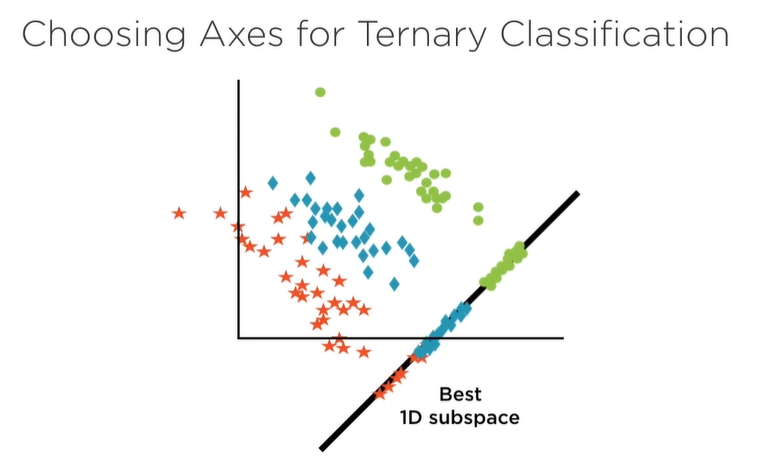


### Quadratic Discrimant analysis
It is variant of LDA, it is used when covariance of X are a function of value of Y. It is used when a linear line is not possible to separate the categories
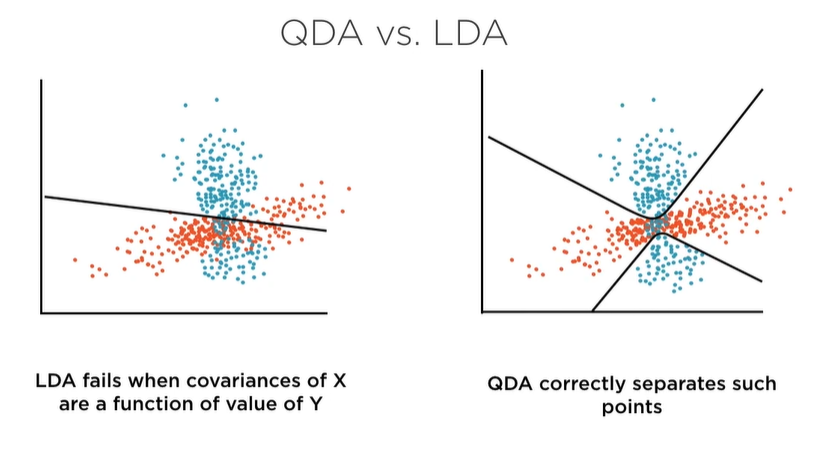



In [19]:
# Training data is numeric. They can be considered a point in the space
# solver = svd: singular value decomposition. it finds the best axis to solve the data
#without calculating the covariance of data. It is useful when we have many
#features in the data and amount of data
def linear_discriminant_fn(x_train,y_train,solver='svd'):
    model = LinearDiscriminantAnalysis(solver=solver)
    model.fit(x_train,y_train)
    return model

In binary classification a 'linear discriminant' is any line that can be used to categorize the data into two classes.

In [20]:
result_dict["survived - linear_discriminant_analysis"] = make_model(linear_discriminant_fn,
                                                                   'Survived',
                                                                   FEATURES,
                                                                   titanic_df)
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.7943760984182777
precision 0.7738693467336684
recall 0.6814159292035398
accuracy_count 452

Test data
accuracy 0.7902097902097902
precision 0.7666666666666667
recall 0.7419354838709677
accuracy_count 113

Classification:  survived - linear_discriminant_analysis

Training data
accuracy 0.7908611599297012
precision 0.7594339622641509
recall 0.7030567685589519
accuracy_count 450

Test data
accuracy 0.8181818181818182
precision 0.8113207547169812
recall 0.7288135593220338
accuracy_count 117



C:\Users\rachh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


We get a warning that said <b>"Variables are collinear"</b>. This is because of the one-hot encoding used in the dataset preprocessing stage. It can lead to 'dummy trap'. One hot encoding can lead to collinearity of features

<i> this can be solved by dropping one of the one of the one-hot-encoding columns

In [21]:
result_dict["survived - linear_discriminant_analysis"] = make_model(linear_discriminant_fn,
                                                                   'Survived',
                                                                   FEATURES[0:-1],
                                                                   titanic_df)
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.7943760984182777
precision 0.7738693467336684
recall 0.6814159292035398
accuracy_count 452

Test data
accuracy 0.7902097902097902
precision 0.7666666666666667
recall 0.7419354838709677
accuracy_count 113

Classification:  survived - linear_discriminant_analysis

Training data
accuracy 0.8031634446397188
precision 0.78125
recall 0.7352941176470589
accuracy_count 457

Test data
accuracy 0.7622377622377622
precision 0.66
recall 0.66
accuracy_count 109



We can now see that the warning is gone, and the accuracy has increased by a little bit

In [22]:
#Quadratic discriminant functions tries to fit a quadratic plane/line to separate the 
#data into different categories
#This should be used when X variables corresponding to different labels have different
#covariances.
#So that is why, covariances should be checked to make sure if QDA is better
def quadratic_discriminant_fn(x_train,y_train):
    model = QuadraticDiscriminantAnalysis()
    model.fit(x_train,y_train)
    return model

In [23]:
result_dict["survived - quadratic_discriminant_analysis"] = make_model(quadratic_discriminant_fn,
                                                                   'Survived',
                                                                   FEATURES[0:-1],
                                                                   titanic_df)
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.7943760984182777
precision 0.7738693467336684
recall 0.6814159292035398
accuracy_count 452

Test data
accuracy 0.7902097902097902
precision 0.7666666666666667
recall 0.7419354838709677
accuracy_count 113

Classification:  survived - linear_discriminant_analysis

Training data
accuracy 0.8031634446397188
precision 0.78125
recall 0.7352941176470589
accuracy_count 457

Test data
accuracy 0.7622377622377622
precision 0.66
recall 0.66
accuracy_count 109

Classification:  survived - quadratic_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.771689497716895
recall 0.7191489361702128
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7954545454545454
recall 0.660377358490566
accuracy_count 116



### Stochastic Gradient Descent
Gradient descent is the way to iteratively converge to find the smallest value of loss 
SGD : performs numerical optimization - one training instance at a time to find the best model parameters.  
Important Parameters:  
max_iter : number of iterations the model should be train  
tol : tolerance value; it refers to the stopping criteria of the model training.
SGD model training will stop if the change in loss between two consecutive iterations is less than the tolerance  
Basically, when a change in loss falls below the tolerance, it means the model isn't really improving that much, so we stop the training

In [24]:
def sgd_fn(x_train,y_train,max_iter = 1000,tol = 1e-3):
    model = SGDClassifier(max_iter = max_iter,tol = tol)
    model.fit(x_train,y_train)
    return model

In [25]:
result_dict["survived -sgd classifier"] = make_model(sgd_fn,      'Survived',
                                                                   FEATURES,
                                                                   titanic_df)
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.7943760984182777
precision 0.7738693467336684
recall 0.6814159292035398
accuracy_count 452

Test data
accuracy 0.7902097902097902
precision 0.7666666666666667
recall 0.7419354838709677
accuracy_count 113

Classification:  survived - linear_discriminant_analysis

Training data
accuracy 0.8031634446397188
precision 0.78125
recall 0.7352941176470589
accuracy_count 457

Test data
accuracy 0.7622377622377622
precision 0.66
recall 0.66
accuracy_count 109

Classification:  survived - quadratic_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.771689497716895
recall 0.7191489361702128
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7954545454545454
recall 0.660377358490566
accuracy_count 116

Classification:  survived -sgd classifier

Training data
accuracy 0.6203866432337434
precision 0.5204081632653061
recall 0.8793103448275862
accuracy_count 353

Test data
accuracy 0.5804195804195

### Support Vector Machines
The objective of SVM is to find a 'hyperplane' that will separate the categories. The nearest instances on either side of the hyperplane are called support vectors. SVMs try to find the widest possible 'street' between the nearest points on either side of the decision plane. It should try to minimize the outliers by penalizing the outliers. There might be some outliers because there might be some points that are on the wrong side of the plane.  
It is possible to use 'kernel trick' to separate the data that are not linearly separable.
SVM tries to penalize outliers by using a penalty factor of C and multiply it by the magnitude of the margin violation. Each outlier must be penalized. If we have very high values of C, it is hard margin classification and if the value of C is less, it is soft margin classifier  
Hence, the SVM optimization tries to 
- maximize the width of the street
- minimize the margin violations  
Both of the goals contradict each other and the job is to find a balance


In [26]:
# the SVM should separate the survivied passengers into one side and the other to another side
# C = penalty. It is the inverse of regularization strength. Smaller C means higher regularization.
# This penalty is applied to point on the wrong side of the margins
# Max iter : 
# tolerance: used to determine if the training should be stopped. if the loss of two 
# consecutive 
# Dual=False when n_samples > n_features. It simplies the problem.
def linear_svc(x_train,y_train,C=1.0,max_iter=1000,tol=1e-3):
    model = LinearSVC(C=C,max_iter=max_iter,tol=tol,dual=False)
    model.fit(x_train,y_train)
    return model

In [27]:
result_dict["survived - linear_svc"] = make_model(linear_svc,      'Survived',
                                                                   FEATURES,
                                                                   titanic_df)
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.7943760984182777
precision 0.7738693467336684
recall 0.6814159292035398
accuracy_count 452

Test data
accuracy 0.7902097902097902
precision 0.7666666666666667
recall 0.7419354838709677
accuracy_count 113

Classification:  survived - linear_discriminant_analysis

Training data
accuracy 0.8031634446397188
precision 0.78125
recall 0.7352941176470589
accuracy_count 457

Test data
accuracy 0.7622377622377622
precision 0.66
recall 0.66
accuracy_count 109

Classification:  survived - quadratic_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.771689497716895
recall 0.7191489361702128
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7954545454545454
recall 0.660377358490566
accuracy_count 116

Classification:  survived -sgd classifier

Training data
accuracy 0.6203866432337434
precision 0.5204081632653061
recall 0.8793103448275862
accuracy_count 353

Test data
accuracy 0.5804195804195

### Nearest neighbors algorithm
it uses training data to find what is the most similar to the current sample. It  compares the sample to every training data and finds the most similar(the nearest neighbors). The distance measure used commonly is 'euclidean'  
k-nearest neighbor and radius neighbors are some of its types 

In [28]:
def radius_neighbors_fn(x_train,y_train,radius=40.0):
    model = RadiusNeighborsClassifier(radius=radius)
    model.fit(x_train,y_train)
    return model

In [29]:
result_dict["survived- radius neighbors"] = make_model(radius_neighbors_fn,      'Survived',
                                                                   FEATURES,
                                                                   titanic_df)
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.7943760984182777
precision 0.7738693467336684
recall 0.6814159292035398
accuracy_count 452

Test data
accuracy 0.7902097902097902
precision 0.7666666666666667
recall 0.7419354838709677
accuracy_count 113

Classification:  survived - linear_discriminant_analysis

Training data
accuracy 0.8031634446397188
precision 0.78125
recall 0.7352941176470589
accuracy_count 457

Test data
accuracy 0.7622377622377622
precision 0.66
recall 0.66
accuracy_count 109

Classification:  survived - quadratic_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.771689497716895
recall 0.7191489361702128
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7954545454545454
recall 0.660377358490566
accuracy_count 116

Classification:  survived -sgd classifier

Training data
accuracy 0.6203866432337434
precision 0.5204081632653061
recall 0.8793103448275862
accuracy_count 353

Test data
accuracy 0.5804195804195

### Decision Trees for Classification
- This model makes rules for classification. The rules are thresholds
- it fits the knowledge into rules and every rule has thresholds
- the order of the decision variables also matter.  
They are used for CART(classification and Regression)  

A decision tree is fit into the training data. This model splits the dataset into group of points, where every subset contains similar points. The data is repeatedly split into subset to form a tree structure. to predict a label, given a test instance, we traverse the decision tree, return the majority of all training instances in the corresponding leaf node. a decision tree is called pure, if the leaf node only contains one label.

In [30]:
# the depth of the tree should be used to prevent it from growing into a large decision tree
# 
def decision_tree_fn(x_train,y_train,max_depth=None,max_features=None):
    model = DecisionTreeClassifier(max_depth=max_depth,max_features=max_features)
    model.fit(x_train,y_train)
    return model

In [31]:
result_dict["survived- decision tree"] = make_model(decision_tree_fn,      'Survived',
                                                                   FEATURES,
                                                                   titanic_df)
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.7943760984182777
precision 0.7738693467336684
recall 0.6814159292035398
accuracy_count 452

Test data
accuracy 0.7902097902097902
precision 0.7666666666666667
recall 0.7419354838709677
accuracy_count 113

Classification:  survived - linear_discriminant_analysis

Training data
accuracy 0.8031634446397188
precision 0.78125
recall 0.7352941176470589
accuracy_count 457

Test data
accuracy 0.7622377622377622
precision 0.66
recall 0.66
accuracy_count 109

Classification:  survived - quadratic_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.771689497716895
recall 0.7191489361702128
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7954545454545454
recall 0.660377358490566
accuracy_count 116

Classification:  survived -sgd classifier

Training data
accuracy 0.6203866432337434
precision 0.5204081632653061
recall 0.8793103448275862
accuracy_count 353

Test data
accuracy 0.5804195804195

For decision tree, the training data accuracy is very high, it is overfitted because decision tree have a tendency to be so during training phase.

### Classification using Naive Bayes
A-priori probabilities and conditional probabilities. 
It classifies the labels based on the conditional probabilities of predicting each of the probability. Whichever is higher is selected as the output.

Naive Bayes makes naive(strong) assumptions about the independence of features, ie it does not take into the consideration that the features maybe related to each other.

In [32]:
def naive_bayes_fn(x_train,y_train,priors=None):
    model = GaussianNB(priors=priors)
    model.fit(x_train,y_train)
    return model


In [33]:
result_dict["survived- naive bayes"] = make_model(naive_bayes_fn,      'Survived',
                                                                   FEATURES,
                                                                   titanic_df)
compare_results()

Classification:  survived - logistic

Training data
accuracy 0.7943760984182777
precision 0.7738693467336684
recall 0.6814159292035398
accuracy_count 452

Test data
accuracy 0.7902097902097902
precision 0.7666666666666667
recall 0.7419354838709677
accuracy_count 113

Classification:  survived - linear_discriminant_analysis

Training data
accuracy 0.8031634446397188
precision 0.78125
recall 0.7352941176470589
accuracy_count 457

Test data
accuracy 0.7622377622377622
precision 0.66
recall 0.66
accuracy_count 109

Classification:  survived - quadratic_discriminant_analysis

Training data
accuracy 0.7961335676625659
precision 0.771689497716895
recall 0.7191489361702128
accuracy_count 453

Test data
accuracy 0.8111888111888111
precision 0.7954545454545454
recall 0.660377358490566
accuracy_count 116

Classification:  survived -sgd classifier

Training data
accuracy 0.6203866432337434
precision 0.5204081632653061
recall 0.8793103448275862
accuracy_count 353

Test data
accuracy 0.5804195804195